Using cuda device


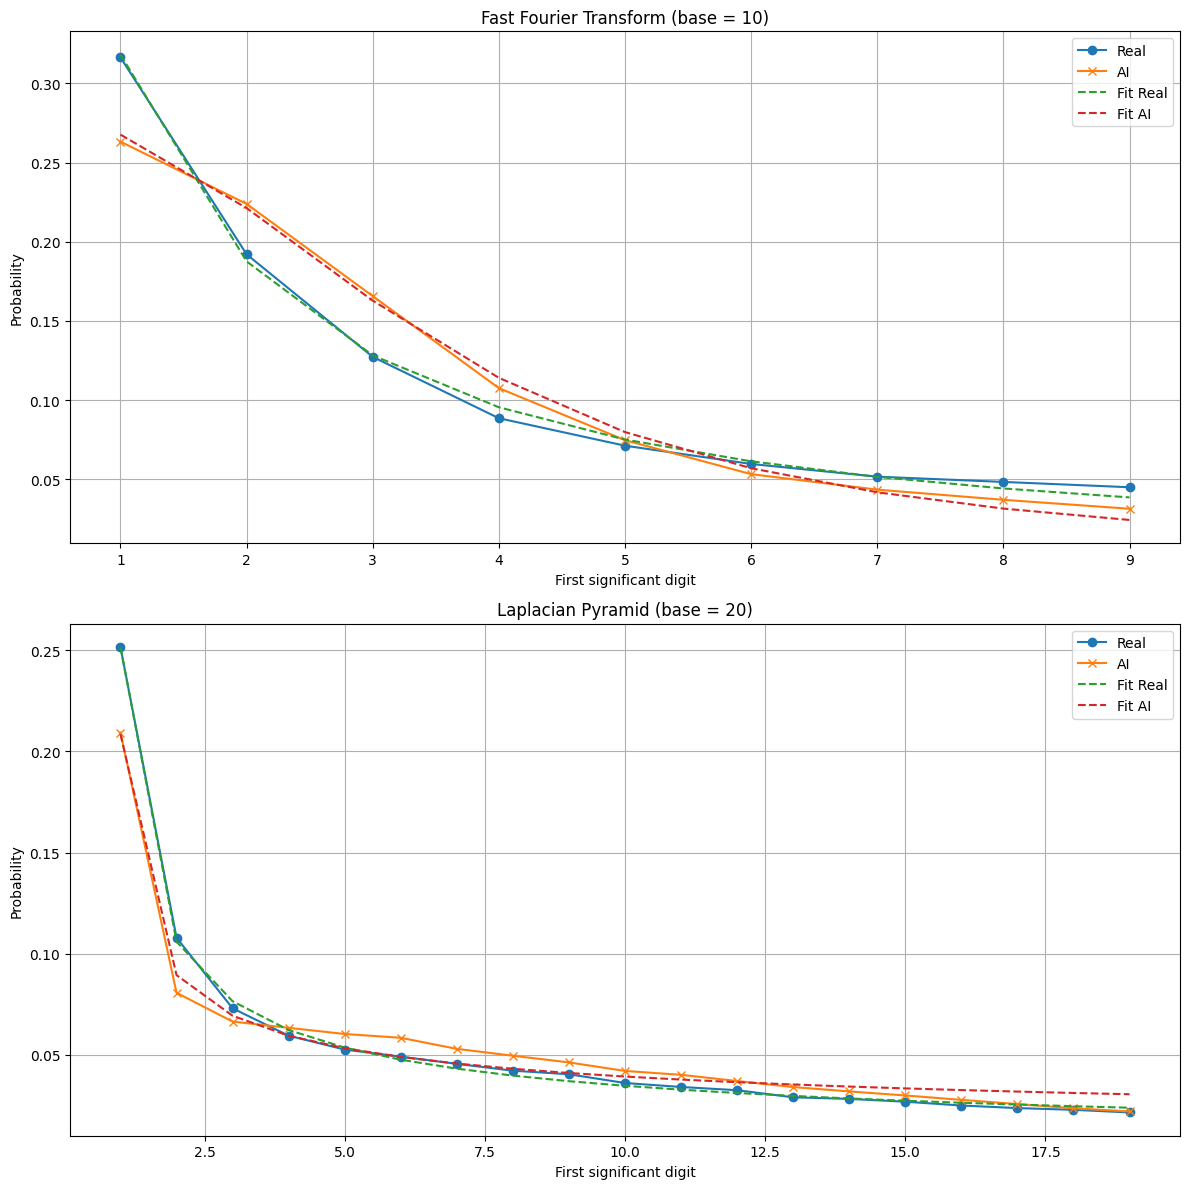

In [22]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import benford_no_quant_v2 as nq2

# torch configuration
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
torch.set_default_device(device)

path_real = 'nq2_correct_ref_wrong_images/impressionism_real(34)alfred-sisley_the-mills-at-moret-1890.jpg'
path_ai = 'nq2_correct_ref_wrong_images/impressionism_ai(53).jpg'

image_real_np = cv2.imread(path_real, cv2.IMREAD_GRAYSCALE)
image_real_torch = torch.tensor(image_real_np, dtype=torch.float, device=device)

image_ai_np = cv2.imread(path_ai, cv2.IMREAD_GRAYSCALE)
image_ai_torch = torch.tensor(image_ai_np, dtype=torch.float, device=device)

dist_real_fft_10 = nq2.get_pdf_est(nq2.first_significant_digit(nq2.compute_fft2d(image_real_torch),10),10)
dist_ai_fft_10 = nq2.get_pdf_est(nq2.first_significant_digit(nq2.compute_fft2d(image_ai_torch),10),10)
dist_fit_real_fft_10 = nq2.get_pdf_fit(dist_real_fft_10)
dist_fit_ai_fft_10 = nq2.get_pdf_fit(dist_ai_fft_10)

dist_real_lp_20 = nq2.get_pdf_est(nq2.first_significant_digit(nq2.compute_lp2d(image_real_np),20),20)
dist_ai_lp_20 = nq2.get_pdf_est(nq2.first_significant_digit(nq2.compute_lp2d(image_ai_np),20),20)
dist_fit_real_lp_20 = nq2.get_pdf_fit(dist_real_lp_20)
dist_fit_ai_lp_20 = nq2.get_pdf_fit(dist_ai_lp_20)

# Visualización
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# --- Fila 2: FFT10 ---
axs[0].plot(dist_real_fft_10.keys(), dist_real_fft_10.values(), label="Real", marker='o')
axs[0].plot(dist_ai_fft_10.keys(), dist_ai_fft_10.values(), label="AI", marker='x')
axs[0].plot(dist_fit_real_fft_10.keys(), dist_fit_real_fft_10.values(), label="Fit Real", linestyle='--')
axs[0].plot(dist_fit_ai_fft_10.keys(), dist_fit_ai_fft_10.values(), label="Fit AI", linestyle='--')
axs[0].set_title("Fast Fourier Transform (base = 10)")
axs[0].set_xlabel("First significant digit")
axs[0].set_ylabel("Probability")
axs[0].legend()
axs[0].grid(True)

# --- Fila 3: LP20 ---
axs[1].plot(dist_real_lp_20.keys(), dist_real_lp_20.values(), label="Real", marker='o')
axs[1].plot(dist_ai_lp_20.keys(), dist_ai_lp_20.values(), label="AI", marker='x')
axs[1].plot(dist_fit_real_lp_20.keys(), dist_fit_real_lp_20.values(), label="Fit Real", linestyle='--')
axs[1].plot(dist_fit_ai_lp_20.keys(), dist_fit_ai_lp_20.values(), label="Fit AI", linestyle='--')
axs[1].set_title("Laplacian Pyramid (base = 20)")
axs[1].set_xlabel("First significant digit")
axs[1].set_ylabel("Probability")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig("benford_distribution.jpg")
plt.show()


Using cuda device


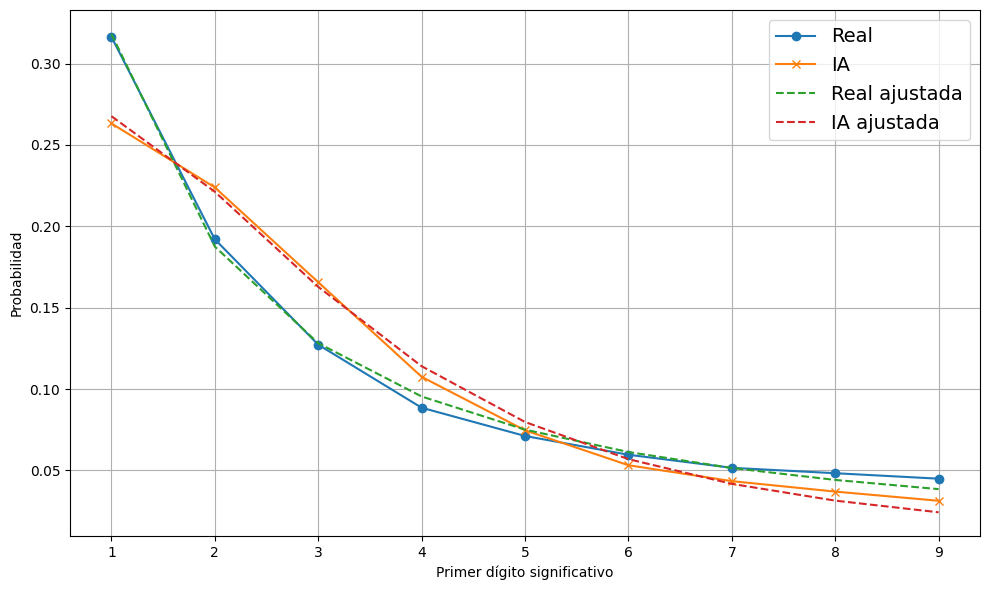

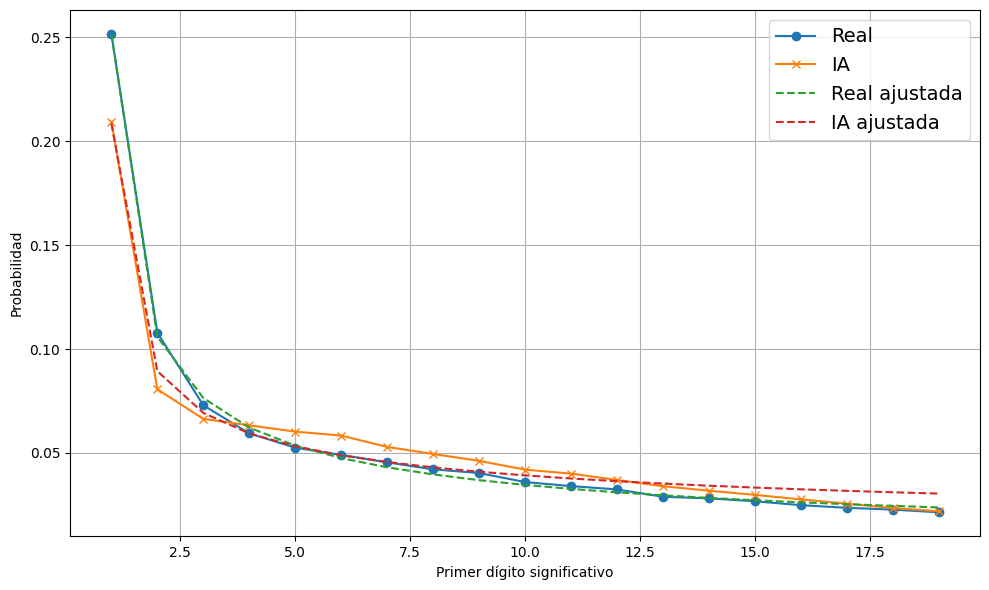

In [7]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import benford_no_quant_v2 as nq2

# torch configuration
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
torch.set_default_device(device)

path_real = 'nq2_correct_ref_wrong_images/impressionism_real(34)alfred-sisley_the-mills-at-moret-1890.jpg'
path_ai = 'nq2_correct_ref_wrong_images/impressionism_ai(53).jpg'

image_real_np = cv2.imread(path_real, cv2.IMREAD_GRAYSCALE)
image_real_torch = torch.tensor(image_real_np, dtype=torch.float, device=device)

image_ai_np = cv2.imread(path_ai, cv2.IMREAD_GRAYSCALE)
image_ai_torch = torch.tensor(image_ai_np, dtype=torch.float, device=device)

dist_real_fft_10 = nq2.get_pdf_est(nq2.first_significant_digit(nq2.compute_fft2d(image_real_torch), 10), 10)
dist_ai_fft_10 = nq2.get_pdf_est(nq2.first_significant_digit(nq2.compute_fft2d(image_ai_torch), 10), 10)
dist_fit_real_fft_10 = nq2.get_pdf_fit(dist_real_fft_10)
dist_fit_ai_fft_10 = nq2.get_pdf_fit(dist_ai_fft_10)

dist_real_lp_20 = nq2.get_pdf_est(nq2.first_significant_digit(nq2.compute_lp2d(image_real_np), 20), 20)
dist_ai_lp_20 = nq2.get_pdf_est(nq2.first_significant_digit(nq2.compute_lp2d(image_ai_np), 20), 20)
dist_fit_real_lp_20 = nq2.get_pdf_fit(dist_real_lp_20)
dist_fit_ai_lp_20 = nq2.get_pdf_fit(dist_ai_lp_20)

# --- Plot 1: FFT10 ---
plt.figure(figsize=(10, 6))
plt.plot(dist_real_fft_10.keys(), dist_real_fft_10.values(), label="Real", marker='o')
plt.plot(dist_ai_fft_10.keys(), dist_ai_fft_10.values(), label="IA", marker='x')
plt.plot(dist_fit_real_fft_10.keys(), dist_fit_real_fft_10.values(), label="Real ajustada", linestyle='--')
plt.plot(dist_fit_ai_fft_10.keys(), dist_fit_ai_fft_10.values(), label="IA ajustada", linestyle='--')
#plt.title("Fast Fourier Transform (base = 10)")
plt.xlabel("Primer dígito significativo")
plt.ylabel("Probabilidad")
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("benford_distribution/fft_base10.jpg")
plt.show()

# --- Plot 2: LP20 ---
plt.figure(figsize=(10, 6))
plt.plot(dist_real_lp_20.keys(), dist_real_lp_20.values(), label="Real", marker='o')
plt.plot(dist_ai_lp_20.keys(), dist_ai_lp_20.values(), label="IA", marker='x')
plt.plot(dist_fit_real_lp_20.keys(), dist_fit_real_lp_20.values(), label="Real ajustada", linestyle='--')
plt.plot(dist_fit_ai_lp_20.keys(), dist_fit_ai_lp_20.values(), label="IA ajustada", linestyle='--')
#plt.title("Laplacian Pyramid (base = 20)")
plt.xlabel("Primer dígito significativo")
plt.ylabel("Probabilidad")
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("benford_distribution/lp_base20.jpg")
plt.show()
